In [38]:
from sklearn import svm
import pickle
import numpy as np
import random
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from itertools import cycle
import itertools

In [39]:
def train_svm(feature_vector,labels):
    model = svm.SVC(kernel='rbf',gamma=0.001,C=10)
    model.fit(feature_vector,labels)
    return model

In [40]:
with open('vgg_outs.pickle', 'rb') as handle:
    d = pickle.load(handle)
print(d.keys())

dict_keys(['train_X', 'train_y', 'test_X', 'test_y'])


In [42]:
train_X = d['train_X']
train_y = d['train_y']
test_X = d['test_X']
test_y = d['test_y']

print(len(train_X))
print(len(train_y))
print(len(test_X))
print(len(test_y))

598
598
103
103


In [44]:
n_train = len(train_X)
combined = list(zip(train_X, train_y))
random.shuffle(combined)
train_X[:], train_y[:] = zip(*combined)
train_X = np.asarray(train_X)
train_X = train_X.reshape((n_train,4096))    
model = train_svm(train_X,train_y)
print(model)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [45]:
test_X = np.asarray(test_X)
n_test = len(test_X)
test_X = test_X.reshape((n_test,4096))    

In [46]:
predictions = []
for img in test_X:
    predictions.append(model.predict([img]))

In [47]:
accuracy_score(test_y,predictions)

0.9514563106796117

In [30]:
print(test_y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [48]:
print(predictions)

[array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), array([1]), arr

In [49]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, predictions, labels=[0,1, 2])

array([[35,  5,  0],
       [ 0, 50,  0],
       [ 0,  0, 13]])

In [50]:
def plot_confusion_matrix(test_y, pred_y, class_names, filename):
    """
    This function prints and plots the confusion matrix.
    """
    cmap = plt.cm.Blues
    # Compute confusion matrix
    cm = confusion_matrix(
        np.argmax(test_y, axis=1), np.argmax(pred_y, axis=1))
    np.set_printoptions(precision=2)
    # Plot confusion matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename + ".png")

In [51]:
y_true = []
y_pred = []
for i in test_y:
    if i == 0:
        y_true.append([1,0,0])
    if i == 1:
        y_true.append([0,1,0])
    if i == 2:
        y_true.append([0,0,1])
for i in predictions:
    if i[0] == 0:
        y_pred.append([1,0,0])
    if i[0] == 1:
        y_pred.append([0,1,0])
    if i[0] == 2:
        y_pred.append([0,0,1])
y_true = np.asarray(y_true)
y_pred = np.asarray(y_pred)

[[35  5  0]
 [ 0 50  0]
 [ 0  0 13]]


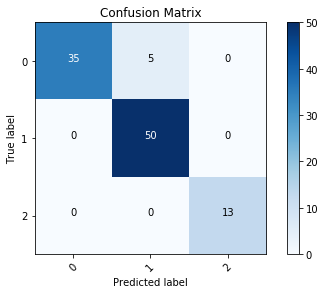

In [52]:
# roc_auc=ComputeROC(test_y, predictions, 3)
class_names = [0,1,2]
plot_confusion_matrix(y_true, y_pred, class_names, 'test_conf')
# accuracy_score(y_s1, pred_y)

Grid Search 

In [37]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC



tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(train_X, train_y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = test_y, clf.predict(test_X)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision



KeyboardInterrupt: 